# Exploring und Plotting 2

**Inhalt:** Selbständige Übung in Gruppen

**Nötige Skills:** Time Series

**Lernziele:**
- Selbständig Daten explorieren und Storyideen testen

# Das Beispiel

Börsenkurse aller Bluechips-Firmen an der Schweizer Börse.

Korpus: https://www.six-group.com/exchanges/shares/explorer/swiss_blue_chips/closings_de.html

Die Daten stammen von dieser Quelle: https://finance.yahoo.com/ und wurden zu einem File kompiliert.

Kompilierungsfile: `dataprojects/Boersenkurse/Börsenkurse kompilieren.ipnyb`

Kompilierte Daten: `dataprojects/Boersenkurse/smi_members.csv`

## Vorbereitung

Entscheiden Sie selbst, welche Libraries Sie brauchen!

In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
from datetime import datetime

In [6]:
from datetime import timedelta

## Datenfile laden

Wie ist die Datei strukturiert? Was müssen wir beim Laden beachten?

Tipp: `index_col=0` verwenden.

In [8]:
path = "dataprojects/Boersenkurse/smi_members.csv"

In [13]:
df = pd.read_csv(path)

In [17]:
df["Datum"] =  pd.to_datetime(df["Unnamed: 0"], format='%Y-%m-%d')

In [19]:
df.set_index("Datum", inplace=True)

In [25]:
df["Unnamed: 0"].pop

,ABB LTD,ADECCO,ALCON,AMS,CLARIANT,CS GROUP,GEBERIT,GIVAUDAN,JULIUS BAER,KUEHNE+NAGEL INT,...,SIKA,SONOVA,SWATCH GROUP,SWISS LIFE HOLDING,SWISS RE,SWISSCOM,TEMENOS,UBS GROUP,VIFOR,ZURICH INSURANCE
Datum,,,,,,,,,,,,,,,,,,,,,
2014-10-13,19.650000,60.400002,NaN,NaN,15.540000,23.689699,289.799988,1461.0,39.500000,117.300003,...,51.849998,143.899994,436.100006,211.899994,73.650002,531.500000,32.000000,15.300,74.449997,279.000000
2014-10-14,19.760000,60.700001,NaN,NaN,15.580000,23.689699,294.399994,1478.0,39.770000,118.400002,...,52.716702,138.399994,435.299988,211.100006,73.050003,530.000000,32.500000,15.330,75.000000,277.600006
2014-10-15,19.160000,58.849998,NaN,NaN,15.160000,22.817499,288.000000,1458.0,37.459999,115.900002,...,51.799999,134.600006,429.500000,205.699997,72.050003,515.500000,32.200001,14.730,73.900002,270.399994
2014-10-16,19.260000,59.500000,NaN,NaN,15.060000,22.292299,288.000000,1466.0,37.509998,117.099998,...,51.783298,133.699997,431.500000,200.500000,71.050003,507.500000,31.650000,14.500,72.849998,265.899994
2014-10-17,19.400000,60.950001,NaN,NaN,15.380000,22.751900,297.200012,1494.0,39.119999,117.500000,...,53.333302,138.399994,438.500000,208.500000,71.699997,515.500000,32.500000,15.050,75.849998,271.899994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-07,18.070000,54.139999,56.840000,44.369999,19.825001,11.475000,464.799988,2760.0,41.790001,147.750000,...,156.500000,230.199997,255.600006,467.899994,103.000000,500.000000,161.000000,10.650,163.000000,380.500000
2019-10-08,17.889999,53.220001,56.020000,42.029999,19.610001,11.405000,459.100006,2733.0,41.410000,145.250000,...,153.649994,230.000000,249.500000,466.200012,102.300003,497.500000,161.449997,10.525,161.649994,376.399994
2019-10-09,17.915001,53.439999,55.790001,42.549999,19.745001,11.420000,460.299988,2737.0,41.389999,146.550003,...,150.699997,230.800003,254.000000,466.000000,102.500000,497.399994,165.149994,10.500,161.500000,377.899994


## Daten checken

**Länge, Spalten, Integrität**

In [27]:
df.shape

(1255, 30)

In [30]:
df_change = df.resample('MS').mean().pct_change() 
#die prozentuale Veränderung von Monat zu Monat

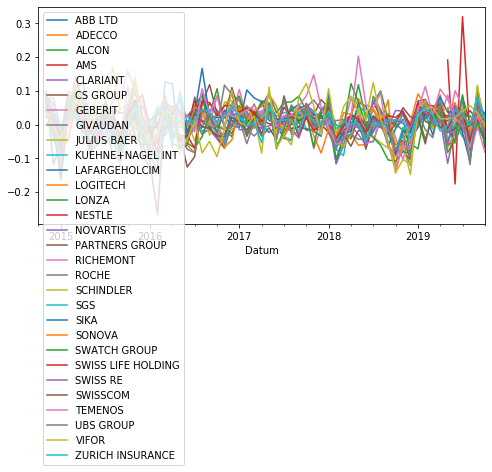

In [33]:
df_change.plot(figsize=(8,4))

In [54]:
df_volatil = df_change[(df_change>=0.05)|(df_change<=-0.05)] 
#wir sagen nun, dass aus unser Sicht alle Firmen volatil sind, die mehr als 5 Prozent rauf oder runter geben

In [55]:
df_volatil

,ABB LTD,ADECCO,ALCON,AMS,CLARIANT,CS GROUP,GEBERIT,GIVAUDAN,JULIUS BAER,KUEHNE+NAGEL INT,...,SIKA,SONOVA,SWATCH GROUP,SWISS LIFE HOLDING,SWISS RE,SWISSCOM,TEMENOS,UBS GROUP,VIFOR,ZURICH INSURANCE
Datum,,,,,,,,,,,,,,,,,,,,,
2014-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-11-01,0.079790,0.051791,NaN,NaN,0.094140,NaN,0.081492,0.075084,0.080326,0.062344,...,0.098170,NaN,NaN,NaN,0.088017,0.067340,NaN,0.078780,NaN,0.051272
2014-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.080518,NaN,NaN,...,-0.117172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-01,-0.108811,NaN,NaN,NaN,-0.088626,-0.162785,NaN,NaN,-0.092450,NaN,...,-0.059087,-0.086786,-0.134472,NaN,NaN,-0.064319,-0.111726,-0.091601,NaN,NaN
2015-02-01,0.052712,0.098208,NaN,NaN,0.073157,NaN,NaN,NaN,0.075744,NaN,...,0.087627,NaN,0.055288,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-01,NaN,NaN,NaN,-0.175920,NaN,-0.052869,NaN,0.053499,-0.055610,NaN,...,NaN,0.064574,NaN,NaN,0.054929,NaN,NaN,-0.051824,NaN,NaN
2019-07-01,NaN,NaN,NaN,0.319397,NaN,NaN,NaN,NaN,NaN,0.068661,...,NaN,NaN,0.088162,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,NaN,-0.060303,NaN,NaN,-0.080427,-0.074018,NaN,NaN,-0.104158,NaN,...,-0.108295,NaN,-0.075969,NaN,NaN,NaN,-0.068187,-0.118676,0.05643,NaN


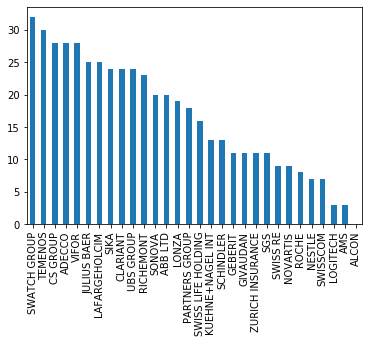

In [53]:
df_volatil.count().sort_values(ascending=False).plot(kind="bar")

## Explorieren

Ihr Ziel ist, aus den Börsendaten eine einfache Story zu generieren.

Überlegen Sie sich dazu:
- Was sind mögliche interessante Fragen?
- Welche Auswertungen sind nötig, um die Fragen zu beanworten?
- Wie stellen Sie die Resultate mittels Grafiken dar?

Arbeiten Sie in Gruppen, um ein Ergebnis zu erarbeiten!

## Die Story
Wählen Sie eine ihrer Fragen aus, die Sie bearbeitet haben.
- Drei bis vier Sätze, welche die Story zusammenfassen
- eine oder mehrere Grafiken, die das Ergebnis illustrieren